## Scatter Plot of Sales and Customer Count by Country

The following visualization illustrates the correlation between total sales and the number of customers across different countries. Countries are categorized into four distinct groups based on sales and customer thresholds, with each group distinguished by a unique color for better clarity and comparison.


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv('preprocessed_sales.csv')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df_copy=df.copy()
df_copy=df_copy[df_copy['Country']!='United Kingdom']
df_copy=df_copy.drop_duplicates(subset=['CustomerId','Country'])
df=df[df['Country']!='United Kingdom']

df['Sale']=df['UnitPrice']*df['Quantity']
new_df=df_copy.groupby(['Country'],as_index=False)['CustomerId'].apply(lambda x: x.count())
new_df2=df.groupby(['Country'],as_index=False)['Sale'].apply(lambda x: x.sum())
result = pd.merge(new_df, new_df2, on="Country")
result

,Country,CustomerId
0,Australia,15
1,Austria,10
2,Bahrain,2
3,Belgium,17
4,Brazil,1
5,Canada,1
6,Channel Islands,11
7,Cyprus,7
8,Denmark,9
9,EIRE,5


In [ ]:
qSA = np.percentile(result['Sale'], 75 )
qCC = np.percentile(result['CustomerId'], 75 )

11.75


In [145]:
for _, row in result.iterrows():
    CC = row['CustomerId']
    SA = row['Sale']
    if CC > qCC and SA > qSA:
        result.loc[row.name, 'labels'] = 'Highest customer & revenue'
    elif CC > qCC and SA < qSA:
        result.loc[row.name, 'labels'] = 'High customer & low revenue'
    elif CC < qCC and SA > qSA:
        result.loc[row.name, 'labels'] = 'High revenue & low customer'
    else:
        result.loc[row.name, 'labels'] = 'Low customer & revenue'
result

,Country,CustomerId,Sale,labels
0,Australia,15,31446.800,Highest customer & revenue
1,Austria,10,13414.330,Low customer & revenue
2,Bahrain,2,805.970,Low customer & revenue
3,Belgium,17,24537.580,High customer & low revenue
4,Brazil,1,268.270,Low customer & revenue
5,Canada,1,1216.660,Low customer & revenue
6,Channel Islands,11,24546.320,Low customer & revenue
7,Cyprus,7,11347.100,Low customer & revenue
8,Denmark,9,50906.850,High revenue & low customer
9,EIRE,5,356041.860,High revenue & low customer


c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\text.py:1465: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\text.py:1467: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecate

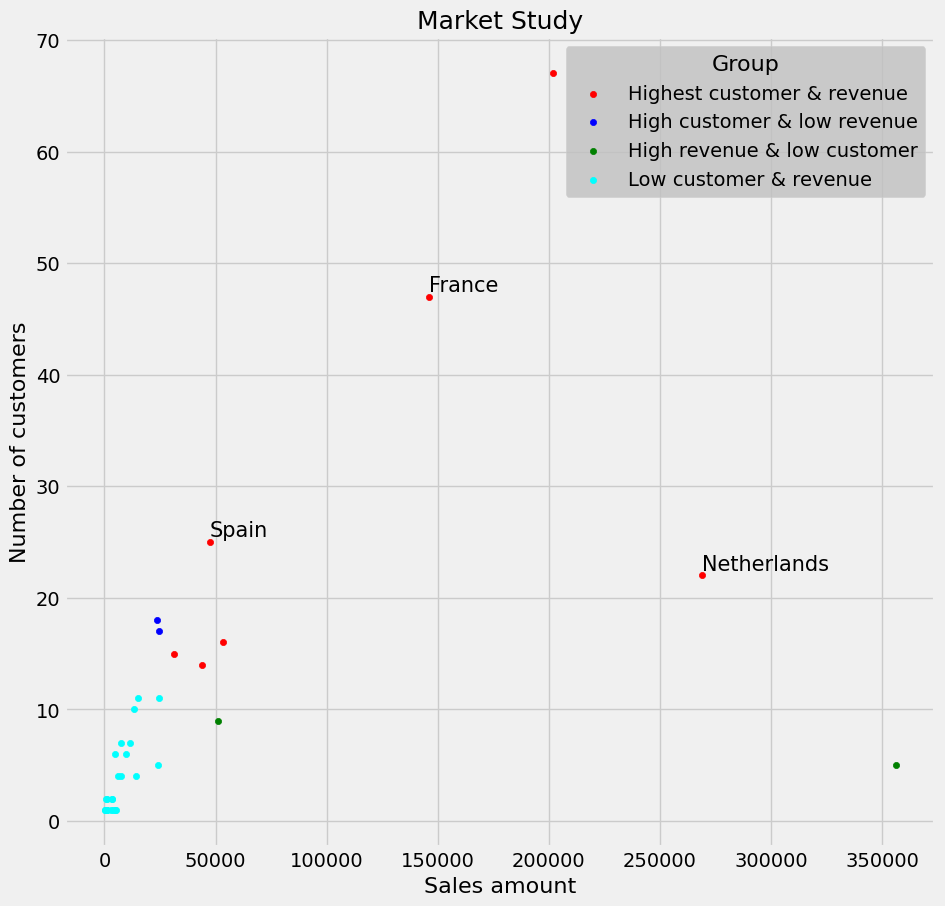

In [ ]:
fig , ax = plt.subplots()
fig.set_size_inches(10,10)
result1=result[result['labels']=='Highest customer & revenue']
result1.plot(x='Sale', y='CustomerId', ax=ax, kind='scatter',
                color='red',s=20,label='Highest customer & revenue' ).set_title('Market Study',fontsize=18)

result1=result[result['labels']=='High customer & low revenue']
result1.plot(x='Sale', y='CustomerId', ax=ax, kind='scatter',
                color='blue',s=20,label='High customer & low revenue' )

result1=result[result['labels']=='High revenue & low customer']
result1.plot(x='Sale', y='CustomerId', ax=ax, kind='scatter',
                color='green',s=20,label='High revenue & low customer' )



result1=result[result['labels']=='Low customer & revenue']
result1.plot(x='Sale', y='CustomerId', ax=ax, kind='scatter',
                color='cyan',s=20,label='Low customer & revenue' )


ax.set_xlabel('Sales amount',fontsize=16)
ax.set_ylabel('Number of customers',fontsize=16)
plt.style.use('fivethirtyeight')
plt.legend(loc="upper right")
ax.legend(loc='upper right',title='Group', frameon=True, title_fontsize=16, facecolor='silver', fontsize=14);

for i in ['France','Spain','Netherlands']:
  a=result.loc[result['Country'] == i]
  ax.annotate(i,xy=(a['Sale'],a['CustomerId']),xycoords='data',
            xytext=(a['Sale'],a['CustomerId']+0.5), textcoords='data',fontsize=15)

  
